In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mvn_log_pdf(x, mu=np.array([0, 0]), Sigma=np.eye(2)):
    """
    Log-pdf of a Multivariate Normal distribution.
    """
    d = len(x)
    det_Sigma = np.linalg.det(Sigma)
    inv_Sigma = np.linalg.inv(Sigma)
    logpdf = -0.5 * d * np.log(2 * np.pi) - 0.5 * np.log(det_Sigma) - 0.5 * np.dot((x - mu).T, np.dot(inv_Sigma, (x - mu)))
    return logpdf

def alpha(xi, yi_plus_1, log_p=mvn_log_pdf):
    """
    Compute the Metropolis acceptance ratio using the MVN target distribution.
    """
    # Compute acceptance ratio for Metropolis step
    ratio = np.exp(log_p(yi_plus_1) - log_p(xi))
    return min(1, ratio)

def AM_algorithm(iterations, dim, initial_X, initial_mu, initial_Sigma, 
                 lambda_initial, gamma_sequence, alpha_star):
    """
    AM algorithm with global adaptive scaling.
    """
    # Initialize
    X = np.zeros((iterations + 1, dim))
    mu = np.zeros((iterations + 1, dim))
    Sigma = np.zeros((iterations + 1, dim, dim))
    lambda_seq = np.zeros(iterations + 1)

    X[0] = initial_X
    mu[0] = initial_mu
    Sigma[0] = initial_Sigma
    lambda_seq[0] = lambda_initial

    for i in range(iterations):
        # Sample from proposal distribution
        Y_i_plus_1 = np.random.multivariate_normal(X[i], lambda_seq[i] * Sigma[i])

        # Accept or reject
        u = np.random.uniform()
        if u < alpha(X[i], Y_i_plus_1):
            X[i+1] = Y_i_plus_1
        else:
            X[i+1] = X[i]

        # Update parameters
        lambda_seq[i+1] = np.exp(np.log(lambda_seq[i]) + gamma_sequence[i] * (alpha(X[i], Y_i_plus_1) - alpha_star))
        mu[i+1] = mu[i] + gamma_sequence[i] * (X[i+1] - mu[i])
        Sigma[i+1] = Sigma[i] + gamma_sequence[i] * (np.outer(X[i+1] - mu[i], X[i+1] - mu[i]) - Sigma[i])

    return X, mu, Sigma, lambda_seq

In [3]:
# Parameters for the test
iterations = 5000
dim = 2
initial_X = np.array([1, 1])
initial_mu = np.array([0, 0])
initial_Sigma = np.eye(2)
lambda_initial = 1
gamma_sequence = [1 / (i + 1)**0.6 for i in range(iterations)]
alpha_star = 0.234

# Running the AM algorithm
X_samples, mu_samples, Sigma_samples, lambda_samples = AM_algorithm(
    iterations, dim, initial_X, initial_mu, initial_Sigma, lambda_initial, gamma_sequence, alpha_star
)


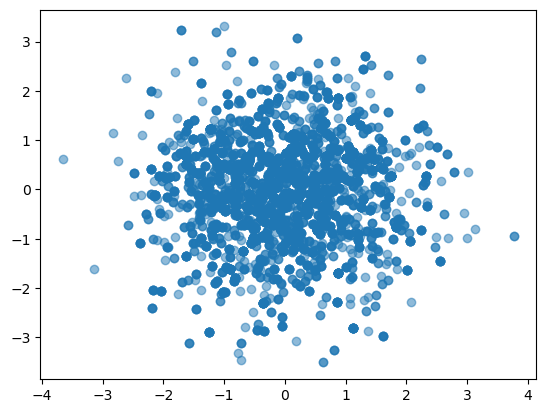

In [4]:
plt.plot(X_samples[:,0], X_samples[:,1], 'o', alpha=0.5)
plt.show()

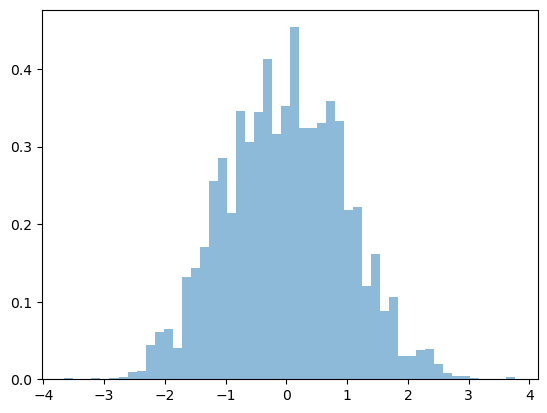

In [5]:
plt.hist(X_samples[:,0], bins=50, density=True, alpha=0.5)
plt.show()

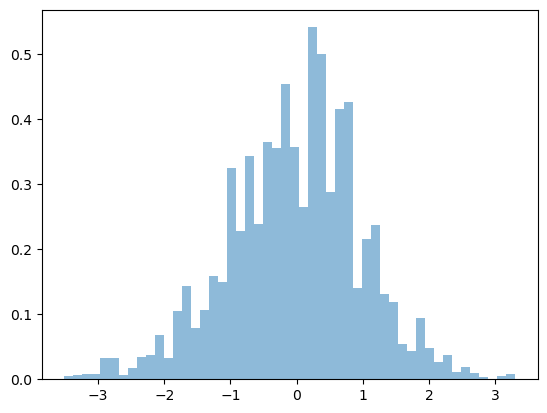

In [6]:
plt.hist(X_samples[:,1], bins=50, density=True, alpha=0.5)
plt.show()